<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/6_2_Pruning_a_Single_MLP_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task:
Initialize an MLP layer and implement magnitude pruning.

# Step 1. Utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 2. Initializing a Single MLP

In [2]:
random.seed(10)
np.random.seed(10)

# Simple MLP layer with 8 input features and 10 output features
weights = np.random.randn(8, 10)  # Normally distributed random weights

print("Weight matrix shape:", weights.shape)

Weight matrix shape: (8, 10)


## Plotting the original weight matrix

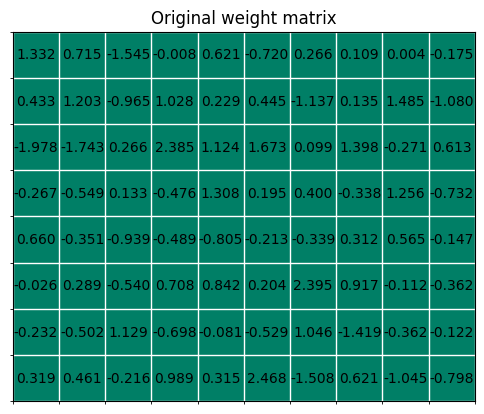

In [3]:
def plot_matrix(matrix, ax, title):
    # Plot binary mask where zero values are marked (for visualization)
    ax.imshow(matrix == 0, vmin=0, vmax=1, cmap='summer')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

    # Annotate each cell with the value
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            text = ax.text(j, i, f'{matrix[i, j]:.3f}', ha="center", va="center", color="k")

    # Add spacing between the cells. Adjust the value as needed.
    ax.set_xticks(np.arange(-0.5, matrix.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, matrix.shape[0], 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)


fig, ax = plt.subplots()
plot_matrix(weights, ax, 'Original weight matrix')

In [4]:
# Find the maximum value

###<--- Write code here
max_val = np.max(weights)
###

print("Max value:", max_val)

# Convert flat index to 2D coordinates
max_index_flat = np.argmax(weights)
row_index, col_index = np.unravel_index(max_index_flat, weights.shape)
print(f"Index of max value (2D): Row={row_index}, Col={col_index}")

Max value: 2.467651056434603
Index of max value (2D): Row=7, Col=5


## The Sparsity Level (proportion of zero weights) of the original weights

In [5]:
number_of_non_zero_values = np.count_nonzero(weights)
total_number_of_elements = weights.size

###<--- Write code here
sparsity_level =  1 - (number_of_non_zero_values/total_number_of_elements)                # proportion of zero weights
###

print("Original Sparsity Level:", sparsity_level)

Original Sparsity Level: 0.0


# Step 3. Magnitude Pruning

Magnitude pruning is a commonly used technique to reduce the size and complexity of DNNs while maintaining good performance. It involves removing weights with smaller magnitudes because these weights contribute less to the output of the model.

By removing these less significant weights, we can reduce the computational and memory requirements of the model without heavily impacting its accuracy.

<p align="center">
  <img src="https://github.com/wl3181/ResNet18-CIFAR10/raw/main/images/magnitude_pruning.png" alt="Magnitude Pruning" width="400"/>
  <img src="https://github.com/wl3181/ResNet18-CIFAR10/raw/main/images/algo_magnitude.png" alt="Magnitude Pruning Algorithm" width="400"/>
</p>



In this section, we will implement magnitude pruning to reduce the size and complexity of a simple MLP network.

Given a weight matrix **W** and a sparsity level **s**, the pruning threshold **T** is determined as:
$ T = quantile(|W|, s)$
where quantile(|W|,s) returns the s-th percentile of the absolute values of W. In other words, T is the value below which the smallest s% of the matrix's absolute values fall.

As s increases, T increases, removing more weights.

In [6]:
def magnitude_pruning(tensor: np.ndarray, sparsity: float):
    sparsity = min(max(0.0, sparsity), 1.0)

    # Clone the tensor
    pruned_tensor = tensor.copy()
    mask = np.zeros_like(tensor, dtype=bool)

    # Compute threshold from sparsity
    flattened_tensor = tensor.flatten()

    ### <--- Write code here
    threshold =  np.quantile(np.abs(flattened_tensor), sparsity)                   # you can use np.quantile()
    ###

    print("Threshold:", threshold)

    # Apply mask and prune
    mask = np.abs(tensor) >= threshold

    ### <--- Write code here
    pruned_tensor = tensor * mask              # multiply layer weights by mask
    ###

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    ax_left, ax_right = axes.ravel()
    plot_matrix(tensor, ax_left, 'Dense Tensor')
    plot_matrix(pruned_tensor, ax_right, 'Sparse Tensor')
    fig.tight_layout()
    plt.show()

    return pruned_tensor

Threshold: 0.4198997092730981


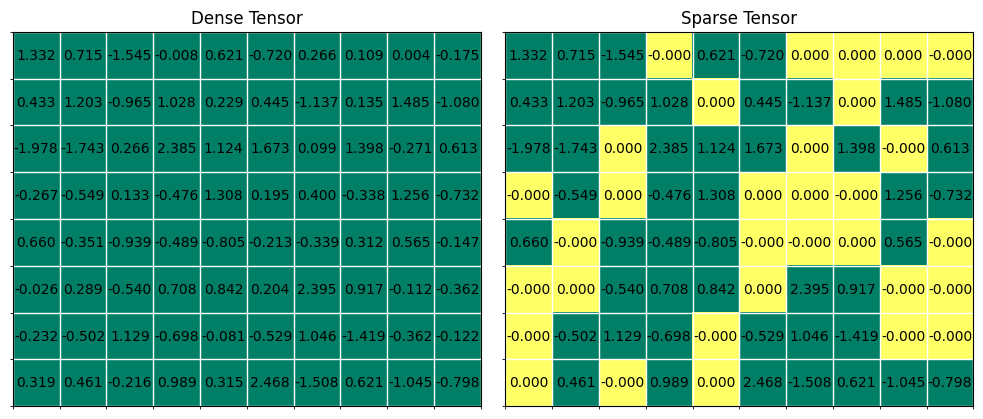

Threshold: 0.7110076017153243


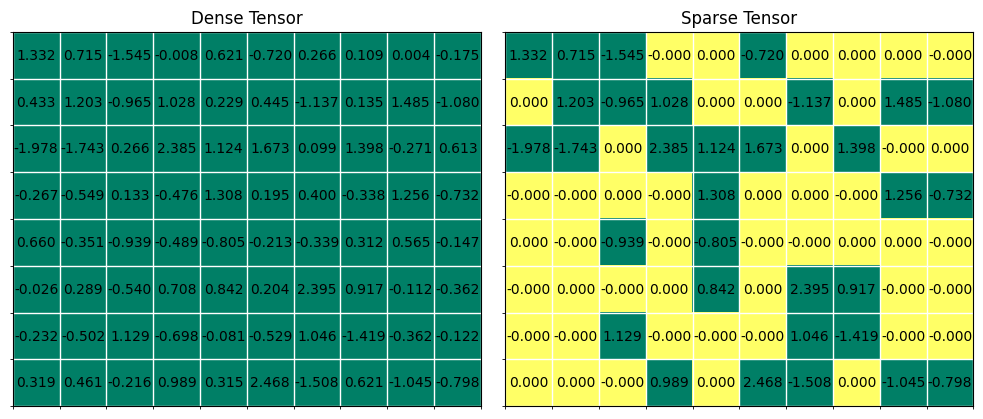

Number of zero values: 48


In [8]:
pruned_tensor_0 = magnitude_pruning(weights, 0.4)
pruned_tensor_1 = magnitude_pruning(weights, 0.6)
num_zeros = np.sum(pruned_tensor_1 == 0)
print("Number of zero values:", num_zeros)

# Step 4. Compare outputs given by the original and pruned MLP

Formula for MSE,

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$


$n$: number of samples

$y_i$: true value for the $i$-th sample

$\hat{y}_i$: predicted value for the $i$-th sample

In [9]:
random.seed(10)
np.random.seed(10)

# Generating a random input tensor
input_tensor = np.random.randn(1, 8)

# Computing outputs using the two MLPs
original_output = np.dot(input_tensor, weights)
pruned_output = np.dot(input_tensor, pruned_tensor_0)

# Compare the outputs
print("Original Output:", original_output)
print("Pruned Output:", pruned_output)

# Compute the Mean Squared Error (MSE) between the original and pruned outputs

###<--- Write code here
pruning_error_mse = np.mean((original_output - pruned_output) ** 2)           # use MSE formula using original and pruned output
###

print("Pruning Error (MSE):", pruning_error_mse)

Original Output: [[ 5.54337842  4.00241015 -3.07908563 -3.84929121 -1.85039403 -3.3783911
  -2.43708052 -2.69239533  1.6985253  -1.89615287]]
Pruned Output: [[ 5.54946462  4.42859204 -2.64336444 -3.83812739 -2.02655553 -3.09800385
  -2.4233316  -3.13039072  1.28902612 -1.80049362]]
Pruning Error (MSE): 0.08501647862280845
